Dataset: https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.BRCA.sampleMap%2FHiSeqV2.gz

## Data preprocessing

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline

In [3]:
filename = 'TCGA.BRCA.sampleMap_HiSeqV2' 
data = pd.read_csv(filename, sep="\t")

In [4]:
data = data.set_index('sample')

In [5]:
data.head() 

,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,9.6287,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,4.1136,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,12.1312,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,10.8013,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


### Drop rows with zero values

In [6]:
df_replace = data.replace(0.0000, np.nan)
df_dropped = df_replace.dropna(axis=0, how='any')
df_dropped.shape

(12657, 1218)

### Split data into two dataframes:
* df1 - normal samples
* df2 - cancer samples

In [7]:
# New dataframe with only normal sample columns
df1 = df_dropped.filter(regex = 'sample|11$', axis =1)

In [8]:
df1.shape

(12657, 114)

In [9]:
df1.head()

,TCGA-A7-A0CH-11,TCGA-E9-A1RC-11,TCGA-A7-A0DB-11,TCGA-BH-A0H9-11,TCGA-BH-A0E0-11,TCGA-BH-A0HA-11,TCGA-BH-A18P-11,TCGA-E9-A1N4-11,TCGA-BH-A18U-11,TCGA-E2-A1LS-11,...,TCGA-BH-A0DT-11,TCGA-BH-A0DD-11,TCGA-BH-A0B2-11,TCGA-BH-A18K-11,TCGA-E2-A1IG-11,TCGA-BH-A0B5-11,TCGA-E9-A1NF-11,TCGA-A7-A13E-11,TCGA-AC-A2FB-11,TCGA-BH-A1EV-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,10.0819,9.5920,9.9530,9.4255,9.5039,10.6813,9.4890,10.4934,10.1442,9.1657,...,9.8437,9.8269,10.1560,9.9853,10.0335,9.3597,10.4037,9.6265,9.9090,9.4048
RNF10,11.9788,12.0187,11.8456,11.9455,11.7797,11.5149,11.7608,11.6013,11.6033,11.9784,...,11.7101,11.9506,11.7253,11.7267,11.8407,12.1359,11.8686,11.9869,11.8263,11.5460
RNF11,11.5315,12.2147,11.5743,12.1199,10.9773,11.1492,12.0529,11.1338,11.5355,12.2425,...,11.5680,11.9201,11.4971,11.5110,11.7084,12.3855,11.8553,11.9344,11.5754,11.8774
RNF13,10.5527,11.0042,11.0165,10.5990,10.2501,10.8266,10.9653,11.0282,10.8097,10.9901,...,10.8299,10.6770,10.2482,10.6006,10.6719,10.8269,11.2244,10.9178,11.0725,11.1226
GTF2IP1,12.3518,12.4805,12.3628,12.2354,12.5141,12.7275,12.2369,12.5722,12.2129,12.3422,...,12.5003,12.7311,12.4451,12.5103,11.9762,12.6041,12.3790,12.7623,12.6265,12.7776


In [10]:
# New dataframe with only cancer sample columns
df2 = df_dropped.filter(regex = 'sample|01|05$', axis = 1)

In [11]:
df2.shape

(12657, 1097)

In [12]:
df2.head()

,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-AR-A24T-01,TCGA-AO-A0JA-01,TCGA-D8-A1XZ-01,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,9.6287,...,8.6545,8.9976,8.5721,10.1826,9.9199,10.0334,11.5144,10.5745,10.9468,10.3164
RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,12.1312,...,11.6361,12.0733,11.9794,12.2653,12.4815,12.0135,11.5818,11.8663,12.2616,12.1570
RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,10.8013,...,11.1444,11.1703,10.8409,11.4117,10.4902,10.8370,10.2736,10.7644,10.7842,11.2420
RNF13,9.9722,10.8702,10.4406,10.4244,10.1480,10.4282,10.3366,10.4248,9.8265,10.3031,...,10.9800,10.3678,10.5156,10.1413,10.1415,10.5614,9.9443,10.4864,9.5713,9.7812
GTF2IP1,11.5966,12.3048,12.8186,12.6427,12.6622,12.4810,12.7240,13.7292,12.2089,12.4242,...,12.2590,12.2903,13.1215,12.6667,12.3656,13.2703,12.2951,12.8246,12.7540,11.3538


# Exploratory data analysis

#### KDE plots of processed data separated by cancer/normal

<Axes: ylabel='Density'>

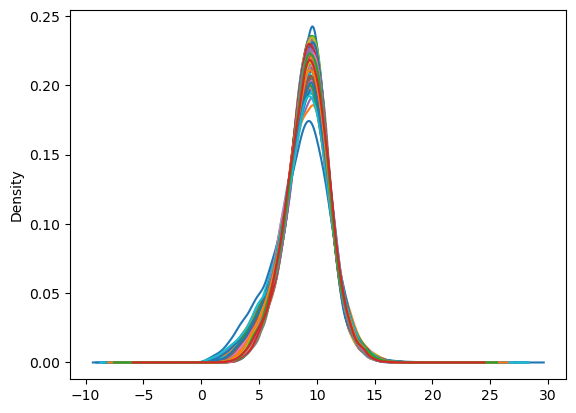

In [35]:
df1.plot(kind='kde', legend=False) # normal cells

<Axes: ylabel='Density'>

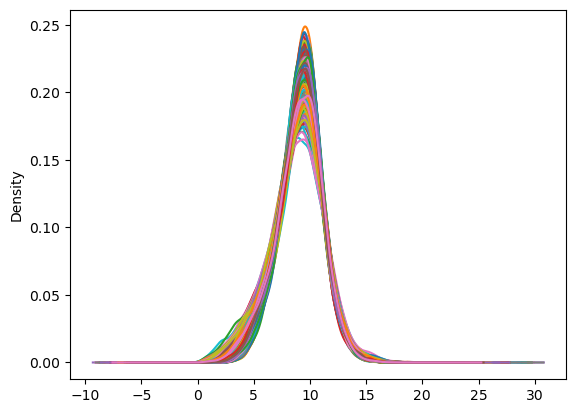

In [36]:
df2.plot(kind='kde', legend=False) # cancer cells

# Differential Expression Analysis Using limma

In [15]:
# !pip install rpy2

import pandas as pd
from rpy2.robjects import pandas2ri
import rpy2.robjects as robjects

pandas2ri.activate()

# Install limma
# install_limma = """
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("limma")
# """

# robjects.r(install_limma)

In [16]:
# Create a combined DataFrame with group labels
df_combined = pd.concat([df1, df2], axis=1)
group_labels = ['normal'] * df1.shape[1] + ['cancer'] * df2.shape[1]

# Convert the combined DataFrame and group labels to R objects
r_df_combined = pandas2ri.py2rpy(df_combined)
r_group_labels = robjects.FactorVector(group_labels)

# Assign the data to R's global environment
robjects.globalenv['r_df_combined'] = r_df_combined
robjects.globalenv['group_labels'] = r_group_labels

In [17]:
# Define R code for running limma
limma_code = """
library(limma)

# Create a design matrix
design <- model.matrix(~ 0 + group_labels)
colnames(design) <- c("normal", "cancer")

# Create a contrast matrix
contrast_matrix <- makeContrasts(cancer - normal, levels=design)

# Fit the model
fit <- lmFit(r_df_combined, design)
fit <- contrasts.fit(fit, contrast_matrix)
fit <- eBayes(fit)

# Get the top differentially expressed genes
top_genes <- topTable(fit, adjust="BH", number=Inf)
"""

# Execute the R code
robjects.r(limma_code)

In [18]:
N = 100
# Retrieve the results
top_genes = robjects.r('top_genes')
top_genes_df = pandas2ri.rpy2py(top_genes)

top_genes_sorted = top_genes_df.sort_values(by='adj.P.Val')

diff_exp = top_genes_sorted.iloc[1:N]

# Print the top N differentially expressed genes
print(f"Top {N} differentially expressed genes (limma):")
print(diff_exp)

Top 100 differentially expressed genes (limma):
                logFC    AveExpr          t        P.Value      adj.P.Val  \
MMP11       -5.821579  11.766993 -34.374903  2.302765e-181  1.457305e-177   
KIF4A       -4.302039   8.329249 -32.816138  1.422428e-169  6.001224e-166   
CAV1         3.380278  10.593444  31.323670  2.583535e-158  8.174951e-155   
UHRF1       -3.690528   8.101967 -31.180364  3.096148e-157  7.837588e-154   
TNS1         2.854456  11.600703  30.962977  1.336500e-155  2.819346e-152   
...               ...        ...        ...            ...            ...   
SKA3        -3.040681   7.005687 -25.256970  1.908731e-113  2.516542e-111   
PALM2-AKAP2  2.155682   9.814954  25.241799  2.454512e-113  3.202759e-111   
NACC1       -1.373338  10.889490 -25.156572  1.007307e-112  1.300967e-110   
H2AFY       -1.088886  12.140613 -25.118069  1.905326e-112  2.435931e-110   
DST          2.740958  11.750000  25.093560  2.858280e-112  3.617724e-110   

                      B  
M

In [19]:
df1_t = df1.loc[diff_exp.index].T
correlations1 = df1_t.corr()
correlations1.head()

,MMP11,KIF4A,CAV1,UHRF1,TNS1,IQGAP3,MYOM1,PPP1R12B,FAM13A,PAFAH1B3,...,LDB2,FOXM1,SH3D19,BIRC5,CD34,SKA3,PALM2-AKAP2,NACC1,H2AFY,DST
MMP11,1.000000,0.497700,-0.302465,0.378125,-0.262243,0.439380,-0.243930,-0.243411,-0.432133,0.409765,...,-0.152810,0.512014,-0.326553,0.462320,-0.055467,0.372616,-0.308306,0.491398,0.535390,-0.142306
KIF4A,0.497700,1.000000,-0.442363,0.873507,-0.415870,0.920785,-0.449139,-0.134435,-0.450802,0.466519,...,-0.295320,0.922041,-0.371571,0.804980,-0.250812,0.866406,-0.422955,0.416153,0.493328,0.161050
CAV1,-0.302465,-0.442363,1.000000,-0.550399,0.900720,-0.385250,0.744942,0.105771,0.727922,-0.790720,...,0.823497,-0.528397,0.888293,-0.446454,0.831332,-0.635500,0.937686,-0.552216,-0.528597,-0.471208
UHRF1,0.378125,0.873507,-0.550399,1.000000,-0.516255,0.870768,-0.570352,-0.019123,-0.581712,0.641378,...,-0.456048,0.880634,-0.504714,0.779050,-0.392192,0.861871,-0.533195,0.533941,0.539634,0.363605
TNS1,-0.262243,-0.415870,0.900720,-0.516255,1.000000,-0.359119,0.820536,0.113200,0.784185,-0.789117,...,0.693024,-0.483134,0.920244,-0.439608,0.689903,-0.649775,0.930733,-0.416718,-0.591027,-0.438363


In [20]:
df2_t = df2.loc[diff_exp.index].T
correlations2 = df2_t.corr()
correlations2.head()

,MMP11,KIF4A,CAV1,UHRF1,TNS1,IQGAP3,MYOM1,PPP1R12B,FAM13A,PAFAH1B3,...,LDB2,FOXM1,SH3D19,BIRC5,CD34,SKA3,PALM2-AKAP2,NACC1,H2AFY,DST
MMP11,1.000000,0.026869,0.102265,0.071513,0.199138,0.013556,-0.074175,-0.038307,-0.213998,0.102268,...,0.156377,-0.084183,0.205919,-0.009925,0.122172,-0.042845,-0.020513,0.044871,0.099899,-0.074248
KIF4A,0.026869,1.000000,-0.346805,0.803815,-0.328570,0.842425,-0.319029,-0.269672,-0.113512,0.074028,...,-0.373795,0.887055,-0.312438,0.829872,-0.341858,0.823656,-0.108912,0.176764,0.269835,-0.231936
CAV1,0.102265,-0.346805,1.000000,-0.320303,0.713953,-0.295279,0.583826,0.517882,0.311754,-0.277178,...,0.784840,-0.345123,0.486991,-0.340775,0.759872,-0.313539,0.656839,-0.256885,-0.277031,0.493234
UHRF1,0.071513,0.803815,-0.320303,1.000000,-0.304424,0.768519,-0.308788,-0.283334,-0.204080,0.227623,...,-0.338705,0.767337,-0.307200,0.744965,-0.313752,0.737997,-0.148633,0.338173,0.334737,-0.263768
TNS1,0.199138,-0.328570,0.713953,-0.304424,1.000000,-0.258325,0.557004,0.654726,0.343134,-0.377769,...,0.699660,-0.369811,0.636704,-0.443237,0.644348,-0.384162,0.591223,-0.219556,-0.335039,0.563600


In [21]:
THRESHOLD = 0.8

In [22]:
adj1 = correlations1.copy()

np.fill_diagonal(adj1.values, 0)

adj1[adj1.abs() < THRESHOLD] = 0

adj1.head()

,MMP11,KIF4A,CAV1,UHRF1,TNS1,IQGAP3,MYOM1,PPP1R12B,FAM13A,PAFAH1B3,...,LDB2,FOXM1,SH3D19,BIRC5,CD34,SKA3,PALM2-AKAP2,NACC1,H2AFY,DST
MMP11,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0
KIF4A,0.0,0.000000,0.00000,0.873507,0.00000,0.920785,0.000000,0.0,0.0,0.0,...,0.000000,0.922041,0.000000,0.80498,0.000000,0.866406,0.000000,0.0,0.0,0.0
CAV1,0.0,0.000000,0.00000,0.000000,0.90072,0.000000,0.000000,0.0,0.0,0.0,...,0.823497,0.000000,0.888293,0.00000,0.831332,0.000000,0.937686,0.0,0.0,0.0
UHRF1,0.0,0.873507,0.00000,0.000000,0.00000,0.870768,0.000000,0.0,0.0,0.0,...,0.000000,0.880634,0.000000,0.00000,0.000000,0.861871,0.000000,0.0,0.0,0.0
TNS1,0.0,0.000000,0.90072,0.000000,0.00000,0.000000,0.820536,0.0,0.0,0.0,...,0.000000,0.000000,0.920244,0.00000,0.000000,0.000000,0.930733,0.0,0.0,0.0


In [23]:
adj2 = correlations2.copy()

np.fill_diagonal(adj2.values, 0)

adj2[adj2.abs() < THRESHOLD] = 0

adj2.head()

,MMP11,KIF4A,CAV1,UHRF1,TNS1,IQGAP3,MYOM1,PPP1R12B,FAM13A,PAFAH1B3,...,LDB2,FOXM1,SH3D19,BIRC5,CD34,SKA3,PALM2-AKAP2,NACC1,H2AFY,DST
MMP11,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
KIF4A,0.0,0.000000,0.0,0.803815,0.0,0.842425,0.0,0.0,0.0,0.0,...,0.0,0.887055,0.0,0.829872,0.0,0.823656,0.0,0.0,0.0,0.0
CAV1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
UHRF1,0.0,0.803815,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
TNS1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [40]:
import networkx as nx

# Create graphs from the adjacency matrices
G1 = nx.from_pandas_adjacency(adj1)
G2 = nx.from_pandas_adjacency(adj2)

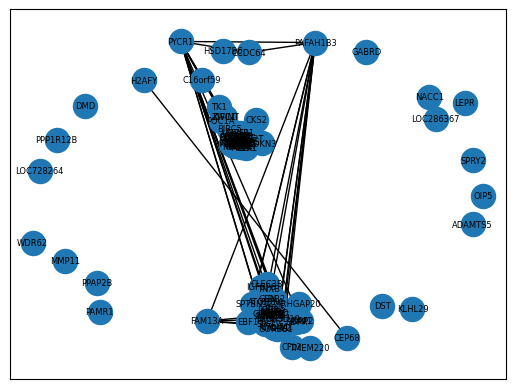

In [26]:
# Draw the normal network
nx.draw_networkx(G1, with_labels=True, font_size=6)
plt.show()

In [27]:
# Identify connected components
connected_components = list(nx.connected_components(G1))
print(f"Number of connected components: {len(connected_components)}")
# Separate outliers and connected genes
outliers = [comp for comp in connected_components if len(comp) == 1]
connected_genes = [comp for comp in connected_components if len(comp) > 1]
print(f"Number of outliers: {len(outliers)}")
print(f"Number of connected genes: {len(connected_genes[0]) if connected_genes else 0}")

Number of connected components: 20
Number of outliers: 18
Number of connected genes: 79


In [28]:
# Extract the largest connected component
largest_component = max(connected_components, key=len)
subgraph = G1.subgraph(largest_component)
# Identify hub genes (top 10 by degree)
degree_dict = dict(subgraph.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
normal_hub_genes = [gene for gene, degree in sorted_degree[:10]]
print("Top Hub Genes:", normal_hub_genes)

Top Hub Genes: ['FOXM1', 'RRM2', 'ASF1B', 'NUSAP1', 'HJURP', 'DLGAP5', 'CCNB2', 'PBK', 'SKA3', 'NUF2']


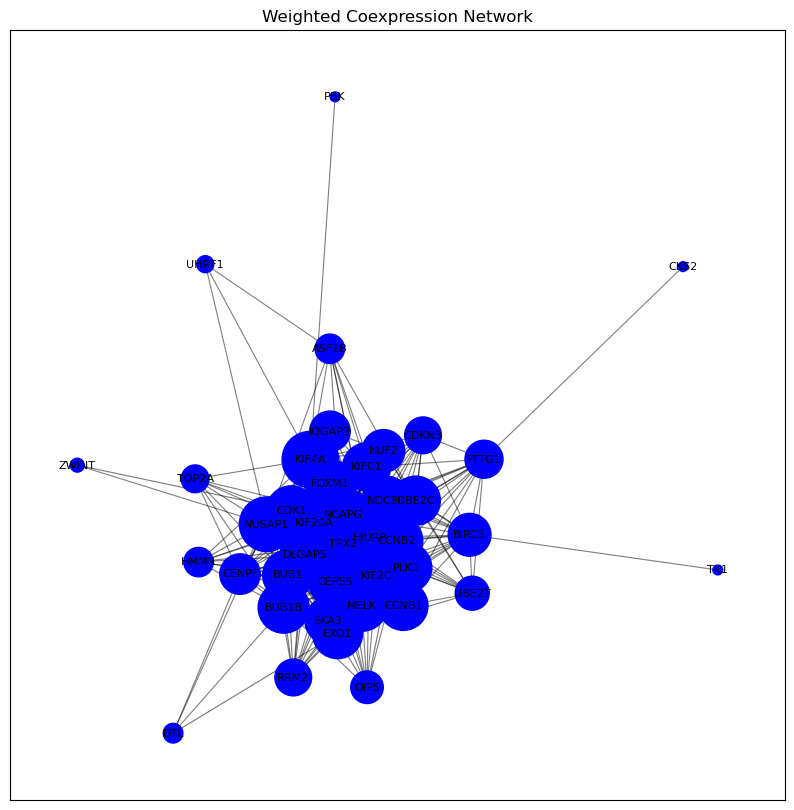

In [38]:
# Visualize the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, k=0.1)  # Position nodes using Fruchterman-Reingold force-directed algorithm
edges = subgraph.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
node_sizes = [degree_dict[node] * 50 for node in subgraph.nodes()]  # scale the node sizes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue')
nx.draw_networkx_edges(subgraph, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_size=8)
plt.title('Weighted Coexpression Network')
plt.show()

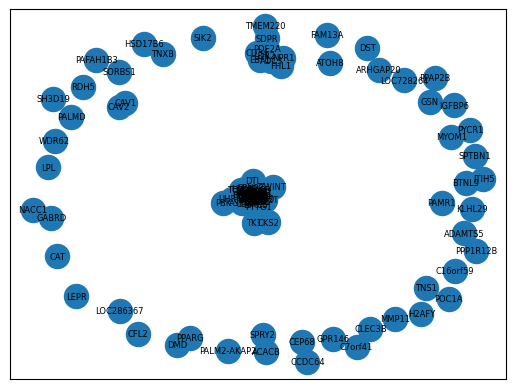

In [30]:
# Draw the cancer network
nx.draw_networkx(G2, with_labels=True, font_size=6)
plt.show()

In [31]:
# Identify connected components
connected_components = list(nx.connected_components(G2))
print(f"Number of connected components: {len(connected_components)}")
# Separate outliers and connected genes
outliers = [comp for comp in connected_components if len(comp) == 1]
connected_genes = [comp for comp in connected_components if len(comp) > 1]
print(f"Number of outliers: {len(outliers)}")
print(f"Number of connected genes: {len(connected_genes[0]) if connected_genes else 0}")

Number of connected components: 52
Number of outliers: 49
Number of connected genes: 40


In [32]:
# Extract the largest connected component
largest_component = max(connected_components, key=len)
subgraph = G2.subgraph(largest_component)
# Identify hub genes (top 10 by degree)
degree_dict = dict(subgraph.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
cancer_hub_genes = [gene for gene, degree in sorted_degree[:10]]
print("Top Hub Genes:", cancer_hub_genes)

Top Hub Genes: ['KIF4A', 'TPX2', 'NUSAP1', 'NCAPG', 'HJURP', 'CCNB2', 'CEP55', 'KIF20A', 'MELK', 'BUB1B']


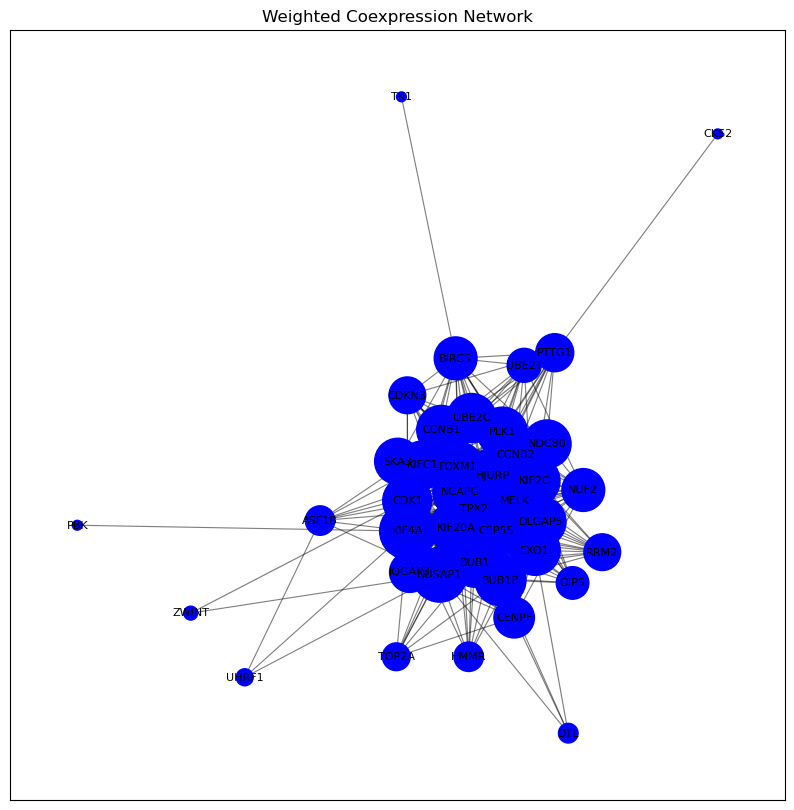

In [37]:
# Visualize the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, k=0.1)  # Position nodes using Fruchterman-Reingold force-directed algorithm
edges = subgraph.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
node_sizes = [degree_dict[node] * 50 for node in subgraph.nodes()]  # scale the node sizes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue')
nx.draw_networkx_edges(subgraph, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_size=8)
plt.title('Weighted Coexpression Network')
plt.show()

<Axes: >

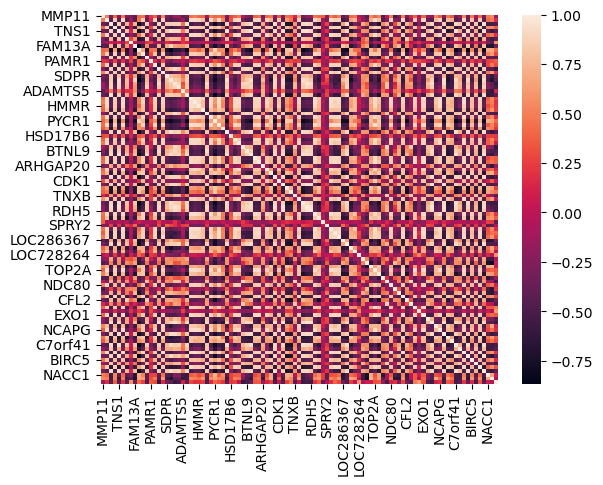

In [33]:
import seaborn as sns

sns.heatmap(correlations1)

<Axes: >

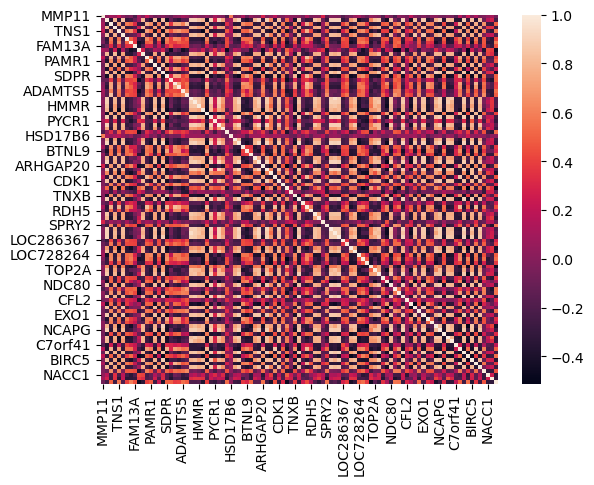

In [55]:
sns.heatmap(correlations2)

In [34]:
only_cancer = set(cancer_hub_genes).difference(normal_hub_genes)
print(only_cancer) 

{'KIF20A', 'BUB1B', 'KIF4A', 'MELK', 'NCAPG', 'CEP55', 'TPX2'}
